In [3]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerPatch
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
from scripts.enums import *

In [4]:
import matplotlib.font_manager

In [5]:
class HandlerExtendedLines(HandlerLineCollection):
    def __init__(self, vertical=False, fill=False):
        self.vertical=vertical
        self.fill=fill
        super().__init__()
        
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent, width, height, fontsize)
        leglines = []
        ydata = np.full_like(xdata, height / (numlines + 1))
        for i in range(numlines):
            args={}
            if self.vertical:
                xd = xdata[0]+(i+.5)*(xdata[-1] - xdata[0])/numlines
                if self.fill:
                    args['lw']=(width-1)/numlines
                legline = mlines.Line2D([xd, xd], [-ydescent*.5, ydata[0]+ydescent*1.5], **args)
            else:
                if self.fill:
                    args['lw']=(height-1)/numlines
                legline = mlines.Line2D(xdata, ydata* (numlines - i) - ydescent)
        
            self.update_prop(legline, orig_handle, legend)
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            try:
                dashes = orig_handle.get_dashes()[i]
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            if dashes[1] is not None:
                legline.set_dashes(dashes[1])
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(lw)
            leglines.append(legline)
        return leglines
    
class VerticalLineCollection(mcol.LineCollection):
    pass

class FillLineCollection(mcol.LineCollection):
    pass

class Scatter:
    pass

class ScatterHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent-8
        width, height = handlebox.width, handlebox.height
        circlewidth=3
        for color in list(Clusters.palette().values())[:-1]:
            patch = mpatches.Circle([x0, y0], circlewidth, facecolor=color, lw=0, transform=handlebox.get_transform())
            x0+=width/len(Clusters)
            y0=(y0+height/2)%height
            
            handlebox.add_artist(patch)
        return patch

def make_legend_arrow(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
    return mpatches.FancyArrow(0, 0, width, height*.5, length_includes_head=True, head_width=0.4*height )


def export_legend(legend, filename="legend_ftonly"):
    plt.axis('off')
    fig =legend.figure
    fig.canvas.draw()
    bbox=legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    bbox.y1=bbox.y1
    fig.savefig(f'../plots/legends/{filename}.eps', format='eps', transparent=False, dpi=300, bbox_inches=bbox)
    transparant_proxy=mlines.Line2D([0,0], [0,0], color="white", alpha=0)

# Legend for smoothed diurnal activity and ratio of harmful content

In [6]:
harmful_ratio_collection = mcol.LineCollection(len(FactTypes.harmful_order()) * [[(0, 0)]], colors=[k for k in FactTypes.harmful_order(attribute='color')])

cpalette=Clusters.palette(include_total=False)
fpalette=FactTypes.palette()
clines = len(Clusters) * [[(0, 0)]]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


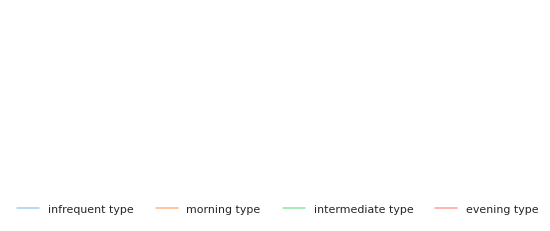

In [7]:
import matplotlib.font_manager
user_handlers = [mlines.Line2D([0,0], [0,0], color=v) for v in cpalette.values()]
user_legend=plt.legend(user_handlers, Clusters, ncol=4, loc = 3, framealpha=1, frameon=False)
export_legend(user_legend, 'legend_user_types_horizonal')

In [8]:
num_posts_collection = FillLineCollection(len(fpalette) * [[(0, 0)]], colors=fpalette.values(), lw=3)

cluster_collection=mcol.LineCollection(clines, colors=cpalette.values())
max_collection=VerticalLineCollection(clines, colors=cpalette.values(), linestyle="--")
min_collection=VerticalLineCollection(clines, colors=cpalette.values(), linestyle=":")
scatter_collection=mcol.CircleCollection([40]*len(Clusters), facecolors=cpalette.values(), edgecolors=cpalette.values())

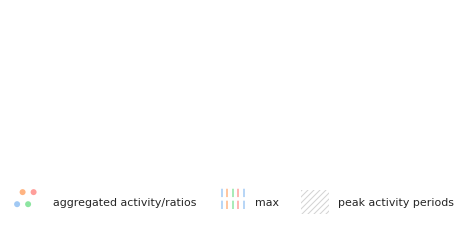

In [9]:
linear_ratio_activity_patches = [
    Scatter(),
    max_collection,
    mpatches.Patch(fc="none", ec='lightgray', alpha=1, lw=0, zorder=0, hatch="////")
]
    
linear_ratio_activity_legend=plt.legend(linear_ratio_activity_patches, ['aggregated activity/ratios', 'max', 'peak activity periods'], ncol=4, 
                  handler_map={
                      mcol.LineCollection: HandlerExtendedLines(vertical=False, fill=False),
                      VerticalLineCollection: HandlerExtendedLines(vertical=True, fill=False),
                      Scatter: ScatterHandler()
                  }, 
                  loc = 3, framealpha=1, frameon=False, handleheight=3, handlelength=2.5)
export_legend(linear_ratio_activity_legend, 'legend_ratio_vars_horizonal')

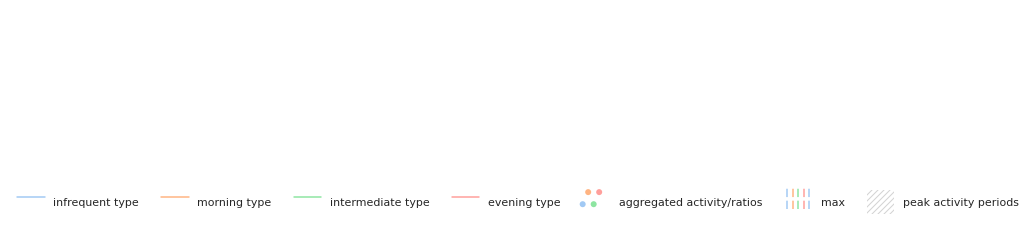

In [10]:
user_ratio_activity_legend=plt.legend(
    user_handlers + linear_ratio_activity_patches,
    list(Clusters) + ['aggregated activity/ratios', 'max','peak activity periods'],
    handler_map={
      mcol.LineCollection: HandlerExtendedLines(vertical=False, fill=False),
      VerticalLineCollection: HandlerExtendedLines(vertical=True, fill=False),
      Scatter: ScatterHandler()
    }, 
    loc = 3, ncol=7, framealpha=1, frameon=False, handleheight=3, handlelength=2.5)
export_legend(user_ratio_activity_legend, 'legend_user_types_and_ratio_horizonal')

# Clockface plots

In [33]:
ft_patches = []
ft_labels = []

for k,v in fpalette.items():
    if k in FactTypes.known_order(attribute="name"):
        ft_labels.append(k)
        ft_patches.append(mpatches.Patch(color=mcolors.rgb2hex(v), label=k))

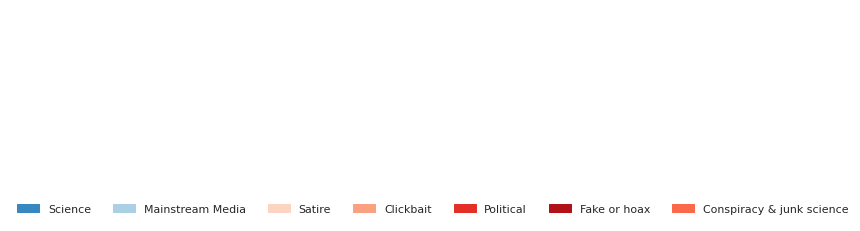

In [37]:
ft_legend=plt.legend(ft_patches, ft_labels,# ncol=7,
                  #handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)},
                  loc = 3, framealpha=1, frameon=False);

export_legend(ft_legend, 'legend_facttypes')

ft_legend=plt.legend(ft_patches, ft_labels, ncol=7,
                  #handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)},
                  loc = 3, framealpha=1, frameon=False);

export_legend(ft_legend, 'legend_facttypes_horizontal')

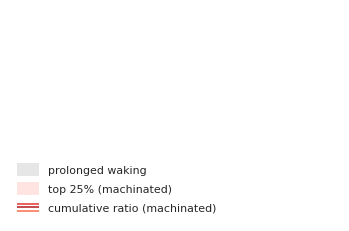

In [38]:
clockface_labels = [
    "prolonged waking", 
    "top 25% (machinated)",
    "cumulative ratio (machinated)",
]
clockface_handles = [
    mpatches.Patch(facecolor='.9', lw=0),
    mpatches.Patch(facecolor='mistyrose', edgecolor='darkred', lw=0, alpha=1),
    harmful_ratio_collection,
]

clockface_legend=plt.legend(clockface_handles, clockface_labels, 
                  handler_map={
                      mcol.LineCollection: HandlerExtendedLines(vertical=False, fill=False),
                      mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow),
                      VerticalLineCollection: HandlerExtendedLines(vertical=False, fill=False),
                      FillLineCollection: HandlerExtendedLines(vertical=True, fill=True)
                  }, loc = 3, framealpha=1, frameon=False, handleheight=1.5, handlelength=2);

export_legend(clockface_legend, 'legend_clockface_other')

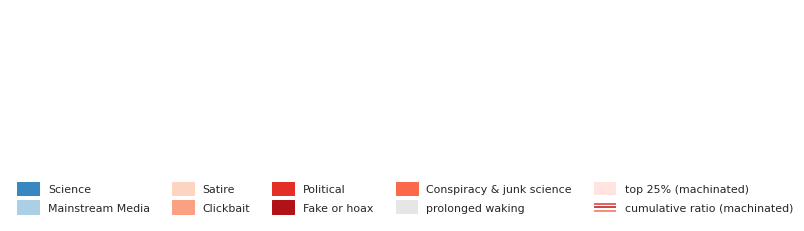

In [39]:
ft_cl_legend=plt.legend(
    list(ft_patches) +clockface_handles, 
    #["y or \n".join(i.split("y or")) for i in ft_labels]+
    list(ft_labels) + clockface_labels, 
    handler_map={
        mcol.LineCollection: HandlerExtendedLines(vertical=False, fill=False),
        mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow),
        VerticalLineCollection: HandlerExtendedLines(vertical=False, fill=False),
        FillLineCollection: HandlerExtendedLines(vertical=True, fill=True)
    }, loc = 3, ncol=5, framealpha=1, frameon=False, handleheight=1.5, handlelength=2);
export_legend(ft_cl_legend, 'legend_facttypes_clockface_horizontal_5col')

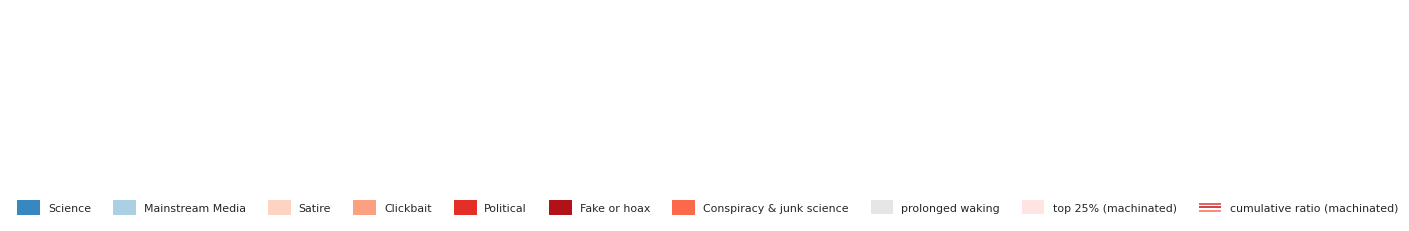

In [40]:
ft_cl_legend=plt.legend(
    list(ft_patches) +clockface_handles,
    #["y or \n".join(i.split("y or")) for i in ft_labels]+
    list(ft_labels) + clockface_labels,
    handler_map={
        mcol.LineCollection: HandlerExtendedLines(vertical=False, fill=False),
        mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow),
        VerticalLineCollection: HandlerExtendedLines(vertical=False, fill=False),
        FillLineCollection: HandlerExtendedLines(vertical=True, fill=True)
    }, loc = 3, ncol=10, framealpha=1, frameon=False, handleheight=1.5, handlelength=2);
export_legend(ft_cl_legend, 'legend_facttypes_clockface_horizontal_10col')